In [22]:
import pandas as pd
data = pd.read_csv("Airlines.csv")
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


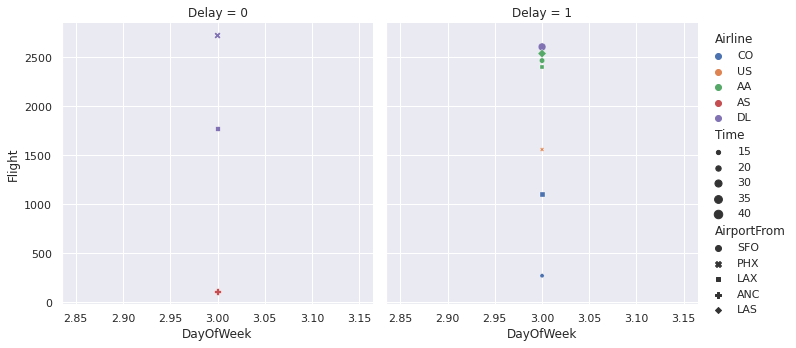

In [20]:
import pandas as pd
import seaborn as sns
sns.set_theme()
df = pd.read_csv("Airlines.csv")
tips = sns.load_dataset("tips")
sns.relplot(
    data=df.head(10),
    x="DayOfWeek", y="Flight", col="Delay",
    hue="Airline", style="AirportFrom", size="Time"
)

In [14]:
import pandas as pd
import plotly.express as px
data = pd.read_csv("Airlines.csv")
data.drop("id",axis=1,inplace=True)
df = data[["AirportFrom","Delay"]].groupby("AirportFrom").agg("count").reset_index()
fig = px.scatter(df,x="AirportFrom",y="Delay", color="AirportFrom")
fig.show()

In [3]:
import pandas as pd
import plotly.express as px
data = pd.read_csv("Airlines.csv")
data.drop("id",axis=1,inplace=True)
df = data[["Airline","Delay"]].groupby("Airline").agg("count").reset_index()
fig = px.histogram(df.head(100),x="Airline",y="Delay",color="Airline")
fig.show()

In [7]:
import pandas as pd
data = pd.read_csv("Airlines.csv")
df = data[["Delay","AirportFrom"]].groupby("Delay").agg("count").reset_index()
sum(df["Delay"])

,Delay,AirportFrom
0,0,299119
1,1,240264


In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
df = pd.read_csv("Airlines.csv")
dummies1 = pd.get_dummies(df["AirportFrom"])
df["Airport"] = dummies1["LAX"]
dummies2 = pd.get_dummies(df["Airline"])
df["Airliner"] = dummies2["US"]
df.drop(columns=["Airline","id","AirportFrom","AirportTo"], axis=1, inplace=True)
x=df.loc[:, df.columns != "Delay"]
X, y = x, df["Delay"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)